In [24]:
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Data Preparation 

In [25]:
file= Path('crypto_data.csv')

In [26]:
df = pd.read_csv(file, index_col=0)
df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [27]:
#list all algorithms in use
algorithms = set(df.Algorithm.values)
print(algorithms)

{'Counterparty', 'M7 POW', 'QUAIT', 'VBFT', 'Progressive-n', 'QuBit', 'PHI1612', 'T-Inside', 'Equihash', 'ECC 256K1', 'Proof-of-Authority', 'Lyra2Z', 'CryptoNight-lite', 'X11GOST', 'Multiple', 'SHA-256 + Hive', 'X13', 'POS 2.0', 'Exosis', 'DPoS', 'Blake2b', 'Dagger-Hashimoto', 'Lyra2REv2', 'Equihash1927', 'Blake', 'Cloverhash', 'X15', 'SHA-256', 'Slatechain', 'SkunkHash', 'M00N', 'POS 3.0', 'CryptoNight Heavy X', 'Zhash', 'Equihash+Scrypt', 'CryptoNight-Lite', 'Skein', 'Shabal256', 'SkunkHash v2 Raptor', 'Blake2S', 'Groestl', '1GB AES Pattern Search', 'IMesh', 'Tribus', 'C11', 'Green Protocol', 'Proof-of-BibleHash', 'Jump Consistent Hash', 'X16R', 'QuarkTX', 'YescryptR16', 'Quark', 'SHA3', 'Scrypt', 'PHI2', 'Curve25519', 'vDPOS', 'Keccak', 'SHA-256D', 'Cryptonight-GPU', 'XEVAN', 'X11', 'Scrypt-n', 'Avesta hash', 'Rainforest', 'Wild Keccak', 'ScryptOG', 'X14', 'HybridScryptHash256', 'Argon2d', 'CryptoNight', 'Ethash', 'HMQ1725', 'NIST5', 'Stanford Folding', 'Momentum', 'PoS', 'SHA3-256'

In [28]:
#print the counts of stocks being currently traded vs. not currently being traded
df["IsTrading"].value_counts()


True     1144
False     108
Name: IsTrading, dtype: int64

In [29]:
#select only the cryptocurrencies that are being traded
df=df.loc[df["IsTrading"]==True]
df["IsTrading"].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [30]:
#delete the IsTrading column; no longer needed
df= df.drop("IsTrading", axis=1)
df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [31]:
#delete all rows with null values
df = df.dropna(axis=0, how= "any")
df.shape

(685, 5)

In [32]:
#sort values in TotalCoinsMined to find negative and zero values
df.TotalCoinsMined.sort_values()

FIII   -5.917978e+09
LBTC    0.000000e+00
RIPO    0.000000e+00
BASH    0.000000e+00
CSH     0.000000e+00
            ...     
QWC     9.955311e+10
NYC     1.430067e+11
GCN     1.630551e+11
BCN     1.840668e+11
BTT     9.899887e+11
Name: TotalCoinsMined, Length: 685, dtype: float64

In [33]:
#select only rows with positive TotalCoinsMined values
df=df[df["TotalCoinsMined"]>0]
len(df)

532

In [34]:
#delete the CoinName column from dataframe
df=df.drop("CoinName",axis= 1)
df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [36]:
#create dummy variables for text in columns Algorithm and ProofType
x=pd.get_dummies(data=df, columns=["Algorithm", "ProofType"])
print(x.shape)
x.head()




(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The string values in "Algorithm" and "ProofType" columns are now converted into numeric values using the get_dummies function. This function expanded the columns from 4 to 98 columns in the dataset. For each unique value in the "Algorithm" and "ProofType" columns, a new column is created. The values in the new columns are now represented by 1s and 0s depending on when the value matches that column's header.

In [38]:
#standardize the data
scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

In [41]:
#print the scaled data
x_scaled[0]

array([-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994, -0.0433963 , -0.18168574, -0.04

In [42]:
#identify the numbers of rows and columns in the scaled data
x_scaled.shape

(532, 98)

# Dimensionality Reduction

In [48]:
#reduce dataset dimensions with PCA using 99% of the data
pca= PCA(n_components=0.99)
prin_components=pca.fit_transform(x_scaled)
prin_components.shape

(532, 86)

In [49]:
#the sum of the explained variance of the principal components
pca.explained_variance_.sum()

97.35133315075765

In [50]:
#reduce dataset dimensions with PCA using 90% of the data
pca= PCA(n_components=0.90)
prin_components=pca.fit_transform(x_scaled)
prin_components.shape

(532, 74)

In [51]:
#the sum of the explained variance of the principal components
pca.explained_variance_.sum()

88.47283457566155

99% of data's explained variance comes to 97.35 with 86 features, and 90% of the data's explained variance dropped down to 88.47 with 74 features.


In [52]:
#reduce the dimension with t-SNE
tsne1=TSNE(perplexity=50)
tsne1Features=tsne1.fit_transform(prin_components)
tsne1Features.shape

(532, 2)

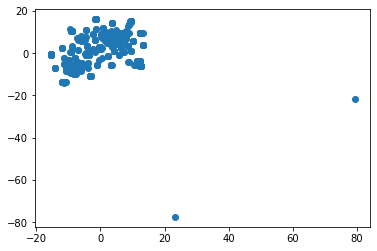

In [54]:
#plot the t-SNE output
x=tsne1Features[:,0]
y=tsne1Features[:,1]

plt.scatter(x,y)
plt.show()

In [ ]:
The scatter plot of the t-SNE output shows one cluster and 2 scattered points. t-SNE was unable to distinctively show differentiation with more than one cluster. 

In [57]:
#identify clusters with k-means
inertia=[]
k=[1,2,3,4,5,6,7,8,9,10]

for value in k:
    kmeans = KMeans(n_clusters=value, random_state=0)
    kmeans.fit(prin_components)
    inertia.append(kmeans.inertia_)

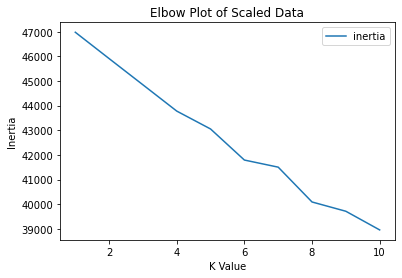

In [64]:
#create an elbow plot
elbowPlot= pd.DataFrame({'K':k, "inertia": inertia})
elbowPlot.plot.line(x='K', y= "inertia")
plt.xlabel("K Value")
plt.ylabel("Inertia")
plt.title("Elbow Plot of Scaled Data")
plt.show()

The elbow plot of the scaled data does not have a clear elbow. Thus, it's unclear what the best value of k to choose. This indicates there is no meaningful clustering within this data set. 

There is one single cluster showing for the t-NSE output but no identifiable clustering with the elbow plot. It may be possible to try another method of determining the optimal k. So far, my recommendation for the investment bank, is to reevaluate whether grouping cyrptocurrencies together is the right thing to do because  there are no true clusters that developed from the algorithms we explored.